In [1]:
# functions to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# gets data and puts into lists
def extract_data(tsv='motion.tsv', csv='blood-glucose.csv'):
    with open(str(tsv)) as txt:
        tsv_data = pd.read_csv(txt, sep="\t", names=["stationary", "walking", "running", "automotive", "cycling"],
                               parse_dates=True, infer_datetime_format=True)
        txt.close()
    with open(str(csv)) as cxv:
        csv_data = pd.read_csv(cxv, sep=",", names=["glucose"], parse_dates=True, infer_datetime_format=True)
        cxv.close()
    print("Data read\n")
    return tsv_data, csv_data


# between 10 is walking. Not 01. if I turn walking into a numpy array, and collect the indexes of all the values
# where it is 01 and 11 then apply those to the timeseries

# calculates activity of series (not yet partitioned/truncated)
def calc_activity(panda_series):
    walking = panda_series
    activity = pd.Timedelta('0 days')
    activity_list = []

    for i in range(len(walking)):
        if i == 0:
            pass
        elif walking[i - 1] == 1 and walking[i] == 0:
            activity = activity + pd.to_datetime(walking.index[i]) - pd.to_datetime(walking.index[i - 1])
        elif walking[i - 1] == 1 and walking[i] == 1:
            activity = activity + pd.to_datetime(walking.index[i]) - pd.to_datetime(walking.index[i - 1])
        else:
            pass
        activity_list.append(activity.total_seconds())

    time_list = pd.to_datetime(tsv['walking'].index.values)

    return activity, activity_list, time_list


# this calculates the axis values for time spent walking.
def calc_graph(panda_series):
    t = pd.date_range(min(panda_series.index.values),max(panda_series.index.values),freq='15min')
    truncated_fourteight = []
    activity_ = []

    for i in range(len(t)):
        fourtyeight = pd.date_range(t[i] - pd.Timedelta('2 days'), t[i], freq='15min')
        truncated_fourteight.append(panda_series.truncate(before=fourtyeight[0], after=fourtyeight[-1]))
    print("Data truncated\n")

    for i in range(len(truncated_fourteight)):
        activity, activity_list, time_list = calc_activity(truncated_fourteight[i])
        activity_.append(activity.total_seconds())
        print('|', end="")
    print("Activity calculated \n")

    return activity_, t



In [2]:
# Extracts tsv and csv data into these variables
tsv, csv = extract_data()

Data read



In [3]:
# Manipulates tsv data into the required format for graphing. Activity is a list of total seconds spent active in past
# 48 hours, and time_list is the date_range from the min to max of the pandas index in 15min intervals. 
panda_series1 = tsv['stationary']
panda_series2 = tsv['walking']
panda_series3 = tsv['running']
panda_series4 = tsv['automotive']
panda_series5 = tsv['cycling']

activity_1, time_list = calc_graph(panda_series1)
activity_2, time_list = calc_graph(panda_series2)
activity_3, time_list = calc_graph(panda_series3)
activity_4, time_list = calc_graph(panda_series4)
activity_5, time_list = calc_graph(panda_series5)



Data truncated

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

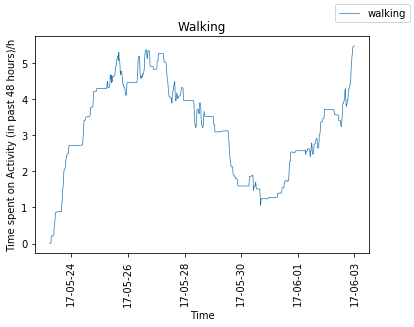

In [4]:
# can plot all activity
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%y-%m-%d')
fig, ax = plt.subplots()


#ax.plot(time_list, (np.asarray(activity_1)/60)/60, label='stationary', linewidth=.7)
ax.plot(time_list, (np.asarray(activity_2)/60)/60, label='walking', linewidth=.7)
#ax.plot(time_list, (np.asarray(activity_3)/60)/60, label = 'running', linewidth=.7)
#ax.plot(time_list, (np.asarray(activity_4)/60)/60, label = 'automotive', linewidth=.7)
#ax.plot(time_list, (np.asarray(activity_5)/60)/60, label = 'cycling', linewidth=.7)
ax.xaxis.set_major_formatter(myFmt)

plt.xticks(rotation=90) 
plt.title('Walking')
plt.xlabel('Time')
plt.ylabel('Time spent on Activity (in past 48 hours)/h')

fig.legend()
#fig.savefig('Walking Data.eps')
plt.show()

In [5]:
# calculates standard deviation of a series to return std and time
def standard_deviation(panda_series):
    panda_series = panda_series.interpolate(method='time')
    time = pd.date_range(min(panda_series.index.values),max(panda_series.index.values),freq='15min')
    truncated_fourteight = []
    standard_dev = []
    
    for i in range(len(panda_series)):
        fourtyeight = pd.date_range(time[i] - pd.Timedelta('2 days'), time[i], freq='15min')
        truncated_fourteight.append(panda_series.truncate(before=fourtyeight[0], after=fourtyeight[-1]))
    print("Blood Glucose Truncated\n")

    for i in range(len(truncated_fourteight)):
        standard_dev_i = np.std(np.asarray(truncated_fourteight[i]), keepdims=True)
        standard_dev.append(standard_dev_i)
    print("Standard Deviation of Truncated Values Calculated\n")
    
    return standard_dev, time


Blood Glucose Truncated

Standard Deviation of Truncated Values Calculated



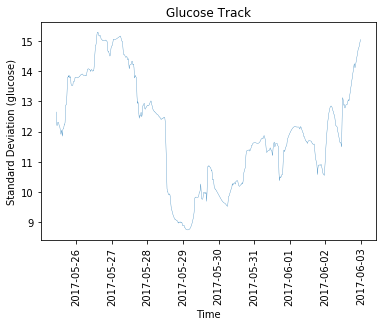

In [6]:
# plots standard deviation of glucose
standard_dev, time = standard_deviation(csv['glucose'])

plt.plot(time, standard_dev, linewidth=.3, label="glucose")

plt.xlabel('Time')
plt.ylabel('Standard Deviation (glucose)')
plt.title('Glucose Track')
plt.xticks(rotation=90) 

#plt.savefig('Glucose.eps')
plt.show()

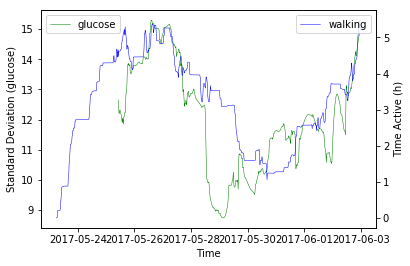

In [7]:
# plots standard deviation of glucose and walking (activity_2 = walking)
myFmt = mdates.DateFormatter('%d')

fig, ax1 = plt.subplots()
ax2=ax1.twinx()
plt.xticks(rotation=90) 


plot_1 = ax1.plot(time, standard_dev, linewidth=.5, label='glucose', color='g')
plot_2 = ax2.plot(time_list, (np.asarray(activity_2)/60)/60, linewidth=.5, label='walking', color='b')

ax2.set_ylabel("Time Active (h)")
ax1.set_xlabel("Time")
ax1.set_ylabel("Standard Deviation (glucose)")
ax1.legend(loc=2)
ax2.legend(loc=1)
ax.xaxis.set_major_formatter(myFmt)

#fig.savefig('Walking_and_Glucose.eps')
plt.show()

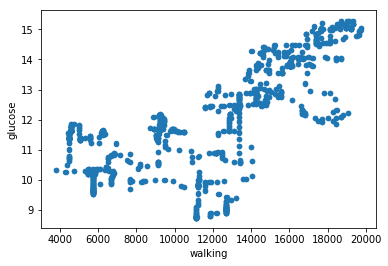

1 = strong positive, 0 = weak, -1 = strong negative

Spearmans (any relationship):
          glucose   walking
glucose  1.000000  0.747846
walking  0.747846  1.000000

Kendall Tau (more insensitive to errors):
          glucose   walking
glucose  1.000000  0.549104
walking  0.549104  1.000000

Pearsons (linear relationship):
          glucose   walking
glucose  1.000000  0.691939
walking  0.691939  1.000000


In [8]:
# correlation
time_series = list(time) + list(time_list)
time_series = np.asarray(pd.Series(time_series).sort_values())

glucose_frame = pd.DataFrame(standard_dev, time, columns=['glucose'])
active_frame = pd.DataFrame(activity_2, time_list, columns=['walking'])

frames = glucose_frame.combine_first(active_frame).dropna(thresh=1).interpolate(method='time')

frames.plot.scatter(x='walking', y='glucose')
plt.show()
print("1 = strong positive, 0 = weak, -1 = strong negative\n")
print("Spearmans (any relationship):")
print(frames.corr(method='spearman'))
print("\nKendall Tau (more insensitive to errors):")
print(frames.corr(method='kendall'))
print("\nPearsons (linear relationship):")
print(frames.corr(method='pearson'))


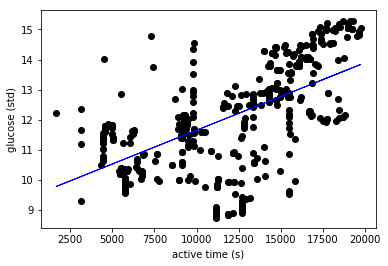

Coefficients: 
 [ 0.00022518]
Mean squared error: 2.02
Variance score: 0.38


In [9]:
# training model

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

walking = frames['walking'].values[:,np.newaxis]
glucose = frames['glucose']

# training/test sets of data 70:30 training:test split for x data (walking - independent variable)
X_train, X_test, y_train, y_test = train_test_split(walking, glucose, test_size=0.3, random_state=42)
y_train = y_train.interpolate()
y_test = y_test.interpolate()

# linear model object
regression = linear_model.LinearRegression()

# fit data
regression.fit(X_train, y_train)

# predict data
y_predict = regression.predict(X_test)

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='blue', linewidth=1)
plt.ylabel('glucose (std)')
plt.xlabel('active time (s)')
plt.show()

# The coefficients
print('Coefficients: \n', regression.coef_)
# The mean squared error - closer to 0 is good
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))
# variance score - 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_predict))

In [10]:
# function for prediction at time 't'

def prediction(time, model=regression):
    nearest = frames.iloc[frames.index.get_loc(time,method='nearest')]
    nearest = nearest.name
    y_predict = regression.predict(frames['walking'][nearest])
    return y_predict, frames['walking'][nearest]
    
predict_time = pd.to_datetime('2017-06-02 20:15:16') 
y_predicted_value, spent = prediction(predict_time)

print("Prediction:\n ")
print(str(predict_time) + ":")
print("Time spent walking - " + str(spent))
print("Glucose variation - "+ str(y_predicted_value))

Prediction:
 
2017-06-02 20:15:16:
Time spent walking - 15824.280867
Glucose variation - [ 12.95674052]


In [11]:
# function for prediction at activity length (seconds)

def prediction(activity_length, model=regression):
    y_predict = regression.predict(activity_length)
    return y_predict

activity_length = 15000
y_predicted_value = prediction(activity_length)

print("Prediction:\n ")
print(str(activity_length) + ":")
print("Glucose variation - "+ str(y_predicted_value))

Prediction:
 
15000:
Glucose variation - [ 12.77113032]
